<a href="https://colab.research.google.com/github/sdsc-bw/DataFactory/blob/develop/finetuning/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finetuning

To find a suitable model for your ML problem is very important. Not every model has the same performane on every task. Some models can be to simple (underfitting) and some models can be to complex for for a problem (overfitting). Also a model has different hyperparameters which also have an impact on the performance. Therefor exist libraries that can be used to find a appropriate model and its hyperparameters. Popular ones are [auto-sklearn](https://github.com/automl/auto-sklearn) and [hyperopt](https://github.com/hyperopt/hyperopt).

## Import packages

In [1]:
import sys

In [2]:
if 'google.colab' in sys.modules:
    !git clone https://github.com/sdsc-bw/DataFactory.git
    !ls
    
    !sudo apt-get install build-essential swig
    !curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
    !pip install auto-sklearn
    
    !pip install scipy
    
    !pip install tsai

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.utils import shuffle
from hyperopt import hp

if 'google.colab' in sys.modules:
    root = 'DataFactory/'
else:
    root = '../'
    
sys.path.insert(0, root + "codes")

from DataFactory import DataFactory

os             : Windows-10-10.0.19041-SP0
python         : 3.8.12
tsai           : 0.2.23
fastai         : 2.5.3
fastcore       : 1.3.27
torch          : 1.9.1+cpu
n_cpus         : 8
device         : cpu
os             : Windows-10-10.0.19041-SP0
python         : 3.8.12
tsai           : 0.2.23
fastai         : 2.5.3
fastcore       : 1.3.27
torch          : 1.9.1+cpu
n_cpus         : 8
device         : cpu
os             : Windows-10-10.0.19041-SP0
python         : 3.8.12
tsai           : 0.2.23
fastai         : 2.5.3
fastcore       : 1.3.27
torch          : 1.9.1+cpu
n_cpus         : 8
device         : cpu


## Load dataset: Diabetes dataset

In [5]:
datafactory = DataFactory()

In [6]:
dataset = load_wine()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = pd.Series(dataset.target)
df = shuffle(df)
X, y = datafactory.preprocess(df, y_col='class')

2021-12-12 17:18:50,813 - DataFactory - INFO - Remove columns with NAN-values of target feature: class
2021-12-12 17:18:50,815 - DataFactory - INFO - Start to transform the categorical columns...
2021-12-12 17:18:50,818 - DataFactory - INFO - ...End with categorical feature transformation
2021-12-12 17:18:50,819 - DataFactory - INFO - Start to clean the given dataframe...
2021-12-12 17:18:50,822 - DataFactory - INFO - Number of INF- and NAN-values are: (0, 0)
2021-12-12 17:18:50,823 - DataFactory - INFO - Set type to float32 at first && deal with INF
2021-12-12 17:18:50,824 - DataFactory - INFO - Remove columns with half of NAN-values
2021-12-12 17:18:50,826 - DataFactory - INFO - Remove constant columns
2021-12-12 17:18:50,830 - DataFactory - INFO - ...End with Data cleaning, number of INF- and NAN-values are now: (0, 0)


## Use DataFactory

### Hyperopt

We provided a function to use hyperopt. Some of the models require finetuning with hyperopt. 

We can define the models that we want to test. Then we have to define a *params* variable that defines the strategy how to examine the search space. There we also can define the parameters of the search space. If parameters for models are not given, it uses our standard search space. Like we do it here:

In [7]:
# list with models to try out
models = ['decision_tree', 'random_forest', 'adaboost', 'inception_time']
# list with params for every model to try out (search strategy of hyperparameters should be in ['parzen', 'random'])

2021-12-12 17:18:50,854 - DataFactory - INFO - Start finetuning...


  9%|████▌                                           | 3/32 [00:01<00:19,  1.50trial/s, best loss: -0.9888888888888889]

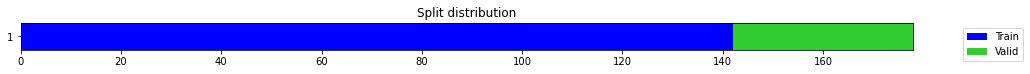

epoch,train_loss,valid_loss,accuracy,time
0,1.063930,1.104405,0.416667,00:00
1,0.979178,1.084720,0.416667,00:00
2,0.894342,1.068356,0.611111,00:00
3,0.834769,1.046011,0.611111,00:00
4,0.784677,1.015872,0.611111,00:00
5,0.754834,0.979461,0.611111,00:00
6,0.723379,0.932466,0.611111,00:00
7,0.697061,0.876592,0.666667,00:00
8,0.674299,0.820640,0.666667,00:00
9,0.658180,0.764057,0.638889,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.440835,0.695235,0.805556,00:00
1,0.441787,0.622794,0.777778,00:00
2,0.435620,0.655320,0.805556,00:00
3,0.423108,0.860328,0.694444,00:00
4,0.413695,0.781568,0.750000,00:00
5,0.417889,0.585507,0.694444,00:00
6,0.419975,2.051849,0.666667,00:00
7,0.421323,0.647319,0.722222,00:00
8,0.448338,0.682471,0.722222,00:00
9,0.445008,1.210352,0.583333,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.189172,0.343670,0.888889,00:00
1,0.190747,0.690403,0.805556,00:00
2,0.200561,0.481919,0.805556,00:00
3,0.198627,0.289292,0.833333,00:00
4,0.213728,4.847577,0.361111,00:00
5,0.284465,2.875016,0.583333,00:00
6,0.304878,3.437142,0.333333,00:00
7,0.312865,2.696081,0.388889,00:00
8,0.311737,1.933144,0.444444,00:00
9,0.306925,1.852220,0.611111,00:00


 16%|███████▌                                        | 5/32 [00:21<02:39,  5.91s/trial, best loss: -0.9888888888888889]

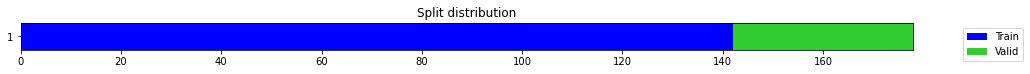

epoch,train_loss,valid_loss,accuracy,time
0,0.874845,1.097838,0.333333,00:01
1,0.759435,1.068106,0.333333,00:01
2,0.695844,1.032644,0.277778,00:01
3,0.670358,0.985979,0.333333,00:01
4,0.658296,0.937478,0.611111,00:01
5,0.669354,0.895048,0.611111,00:01
6,0.644372,0.917134,0.361111,00:01
7,0.632853,0.964384,0.527778,00:01
8,0.620048,0.938425,0.611111,00:01
9,0.610579,0.970294,0.611111,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.421255,0.831681,0.750000,00:01
1,0.423015,0.895480,0.722222,00:01
2,0.418512,1.429590,0.583333,00:01
3,0.422222,1.832046,0.527778,00:01
4,0.429016,0.748770,0.777778,00:01
5,0.428200,1.864389,0.527778,00:01
6,0.422829,2.519149,0.500000,00:01
7,0.422400,10.806741,0.416667,00:01
8,0.442506,2.197828,0.222222,00:01
9,0.464339,34.638985,0.250000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.512799,0.544206,0.833333,00:01
1,0.491892,0.561619,0.861111,00:01
2,0.491300,0.639284,0.750000,00:01
3,0.493195,0.839514,0.666667,00:01
4,0.507499,1.311380,0.611111,00:01
5,0.500167,1.980702,0.611111,00:01
6,0.493517,2.780145,0.611111,00:01
7,0.484472,3.514045,0.611111,00:01
8,0.481543,4.124549,0.611111,00:01
9,0.476129,3.857818,0.611111,00:01


 25%|████████████                                    | 8/32 [01:52<06:41, 16.72s/trial, best loss: -0.9888888888888889]

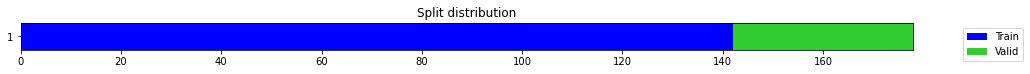

epoch,train_loss,valid_loss,accuracy,time
0,1.237104,1.103915,0.333333,00:00
1,1.129346,1.088289,0.333333,00:00
2,1.012046,1.078142,0.361111,00:00
3,0.922343,1.066674,0.444444,00:00
4,0.855462,1.050520,0.555556,00:00
5,0.806485,1.029231,0.611111,00:00
6,0.765795,1.001728,0.611111,00:00
7,0.740213,0.962114,0.611111,00:00
8,0.717708,0.914685,0.666667,00:00
9,0.704943,0.860712,0.666667,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.408053,0.681980,0.666667,00:00
1,0.412405,0.659207,0.722222,00:00
2,0.425555,0.623184,0.777778,00:00
3,0.433941,0.637402,0.777778,00:00
4,0.442984,0.594388,0.722222,00:00
5,0.443274,0.858177,0.694444,00:00
6,0.475195,1.001746,0.638889,00:00
7,0.467334,0.729468,0.750000,00:00
8,0.459265,0.826245,0.666667,00:00
9,0.448620,0.791842,0.750000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.200763,0.307996,0.861111,00:00
1,0.210146,0.282936,0.916667,00:00
2,0.207499,0.260908,0.888889,00:00
3,0.208666,0.284650,0.888889,00:00
4,0.204149,0.375297,0.861111,00:00
5,0.205382,1.484754,0.638889,00:00
6,0.211646,0.368393,0.861111,00:00
7,0.202093,0.403948,0.805556,00:00
8,0.197960,2.397316,0.555556,00:00
9,0.200766,2.232386,0.611111,00:00


 44%|████████████████████▌                          | 14/32 [02:11<01:28,  4.94s/trial, best loss: -0.9888888888888889]

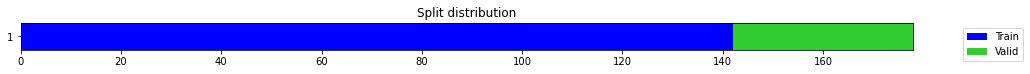

epoch,train_loss,valid_loss,accuracy,time
0,1.035540,1.092950,0.250000,00:00
1,0.951333,1.088835,0.250000,00:00
2,0.865348,1.077729,0.250000,00:00
3,0.804965,1.060233,0.277778,00:00
4,0.759048,1.035087,0.444444,00:00
5,0.725560,1.003929,0.583333,00:00
6,0.698242,0.964466,0.611111,00:00
7,0.677324,0.913062,0.611111,00:00
8,0.660803,0.858083,0.666667,00:00
9,0.644257,0.800918,0.666667,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.417495,0.748620,0.722222,00:00
1,0.433264,0.766567,0.694444,00:00
2,0.431819,0.846140,0.666667,00:00
3,0.443124,0.663456,0.750000,00:00
4,0.431573,0.778430,0.666667,00:00
5,0.465261,0.817146,0.638889,00:00
6,0.469084,1.233153,0.388889,00:00
7,0.478273,1.154771,0.388889,00:00
8,0.480206,0.845600,0.583333,00:00
9,0.478699,0.596327,0.666667,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.264772,0.392590,0.861111,00:00
1,0.251125,0.454810,0.805556,00:00
2,0.244621,0.627668,0.750000,00:00
3,0.231678,0.881554,0.722222,00:00
4,0.233634,1.370253,0.527778,00:00
5,0.247630,2.233088,0.500000,00:00
6,0.244547,1.414672,0.527778,00:00
7,0.238154,2.065756,0.527778,00:00
8,0.232866,4.457661,0.416667,00:00
9,0.227695,3.712977,0.583333,00:00


 47%|██████████████████████                         | 15/32 [02:27<02:08,  7.57s/trial, best loss: -0.9888888888888889]

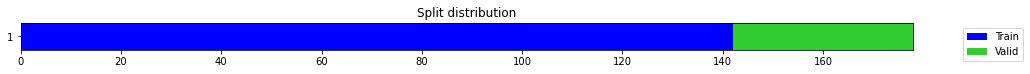

epoch,train_loss,valid_loss,accuracy,time
0,0.932851,1.085237,0.250000,00:01
1,0.770009,1.075895,0.250000,00:01
2,0.694840,1.049208,0.250000,00:01
3,0.670583,1.006834,0.416667,00:01
4,0.658486,0.951629,0.583333,00:01
5,0.638341,0.908293,0.611111,00:01
6,0.622708,0.874634,0.611111,00:01
7,0.612204,0.817971,0.611111,00:01
8,0.597191,0.726448,0.611111,00:01
9,0.588481,0.664377,0.611111,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.332343,1.014851,0.722222,00:01
1,0.330245,0.797136,0.777778,00:01
2,0.329910,0.999266,0.722222,00:01
3,0.317081,1.078403,0.666667,00:01
4,0.347734,25.247229,0.416667,00:01
5,0.513442,31.943668,0.277778,00:01
6,0.536963,30.524004,0.250000,00:01
7,0.542190,16.315376,0.250000,00:01
8,0.541756,8.364204,0.305556,00:01
9,0.538423,1.975933,0.472222,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.296831,0.789505,0.694444,00:01
1,0.295674,1.600684,0.583333,00:01
2,0.304638,0.931346,0.722222,00:01
3,0.311454,4.152960,0.583333,00:01
4,0.314949,3.025123,0.583333,00:01
5,0.335617,4.857795,0.555556,00:01
6,0.331135,1.135729,0.666667,00:01
7,0.323234,4.031821,0.611111,00:01
8,0.317413,7.745381,0.555556,00:01
9,0.325584,0.906583,0.777778,00:01


 53%|████████████████████████▉                      | 17/32 [04:11<05:44, 22.95s/trial, best loss: -0.9888888888888889]

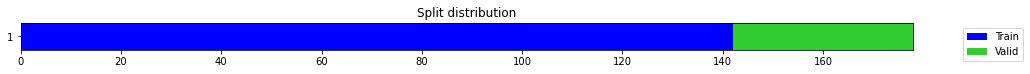

epoch,train_loss,valid_loss,accuracy,time
0,1.324218,1.125411,0.333333,00:00
1,1.194364,1.105163,0.333333,00:00
2,1.062717,1.086721,0.333333,00:00
3,0.959964,1.066629,0.333333,00:00
4,0.884509,1.043227,0.472222,00:00
5,0.830251,1.014585,0.777778,00:00
6,0.785518,0.980117,0.805556,00:00
7,0.754440,0.933896,0.750000,00:00
8,0.728479,0.880716,0.722222,00:00
9,0.707293,0.828203,0.694444,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.431745,0.680633,0.750000,00:00
1,0.430270,0.704689,0.750000,00:00
2,0.429386,0.709296,0.750000,00:00
3,0.428072,0.904827,0.666667,00:00
4,0.423963,1.596529,0.527778,00:00
5,0.458186,0.539013,0.833333,00:00
6,0.462030,0.927889,0.611111,00:00
7,0.470073,0.939200,0.611111,00:00
8,0.467311,0.897599,0.666667,00:00
9,0.459401,1.123819,0.666667,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.226089,0.590081,0.777778,00:00
1,0.210519,0.469770,0.833333,00:00
2,0.210000,0.605926,0.777778,00:00
3,0.221792,0.892256,0.722222,00:00
4,0.211840,1.374115,0.555556,00:00
5,0.203172,0.574616,0.777778,00:00
6,0.207284,14.714748,0.416667,00:00
7,0.363063,7.993711,0.250000,00:00
8,0.373646,5.505109,0.333333,00:00
9,0.384543,2.643249,0.527778,00:00


 62%|█████████████████████████████▍                 | 20/32 [04:33<02:34, 12.89s/trial, best loss: -0.9888888888888889]

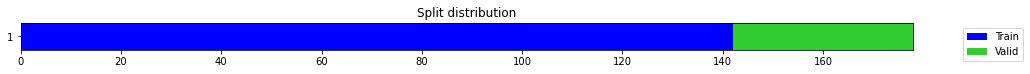

epoch,train_loss,valid_loss,accuracy,time
0,0.948693,1.099843,0.250000,00:00
1,0.878363,1.089865,0.250000,00:00
2,0.817097,1.081976,0.250000,00:00
3,0.775215,1.069494,0.250000,00:00
4,0.733619,1.048856,0.250000,00:00
5,0.708311,1.021783,0.333333,00:00
6,0.684964,0.990787,0.555556,00:00
7,0.666311,0.951696,0.777778,00:00
8,0.651824,0.902979,0.722222,00:00
9,0.641429,0.856534,0.638889,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.389842,0.635686,0.805556,00:00
1,0.389806,0.579178,0.777778,00:00
2,0.379763,0.606098,0.805556,00:00
3,0.382934,0.738249,0.694444,00:00
4,0.388699,0.548559,0.777778,00:00
5,0.393396,0.946959,0.638889,00:00
6,0.417759,0.688031,0.694444,00:00
7,0.431159,1.040956,0.611111,00:00
8,0.434226,1.065571,0.611111,00:00
9,0.429264,2.155121,0.666667,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.143230,0.200016,0.916667,00:00
1,0.149711,0.207309,0.916667,00:00
2,0.152223,0.556203,0.777778,00:00
3,0.154440,0.692736,0.750000,00:00
4,0.153696,0.589767,0.805556,00:00
5,0.174593,0.183550,0.916667,00:00
6,0.165457,8.059450,0.416667,00:00
7,0.162034,2.030741,0.583333,00:00
8,0.198194,5.601939,0.527778,00:00
9,0.196975,4.183732,0.527778,00:00


 69%|████████████████████████████████▎              | 22/32 [04:54<01:50, 11.07s/trial, best loss: -0.9888888888888889]

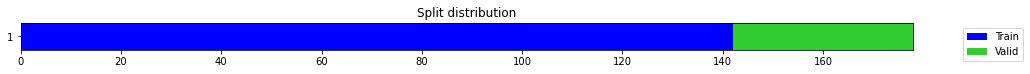

epoch,train_loss,valid_loss,accuracy,time
0,0.873756,1.178356,0.416667,00:01
1,0.740370,1.112216,0.416667,00:01
2,0.691249,1.053067,0.638889,00:01
3,0.662358,0.993648,0.583333,00:01
4,0.677361,0.953245,0.583333,00:01
5,0.649091,0.911096,0.583333,00:01
6,0.636397,0.891708,0.611111,00:01
7,0.621233,0.896173,0.611111,00:01
8,0.611655,0.946835,0.611111,00:01
9,0.602251,0.978791,0.611111,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.433210,1.070008,0.694444,00:01
1,0.406950,0.905896,0.750000,00:01
2,0.413940,0.874192,0.750000,00:01
3,0.424119,2.691491,0.500000,00:01
4,0.415859,2.523244,0.583333,00:01
5,0.420250,31.507830,0.416667,00:01
6,0.519002,1.512288,0.361111,00:01
7,0.525005,1.967736,0.361111,00:01
8,0.524105,8.250035,0.250000,00:01
9,0.529312,15.065148,0.250000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.446316,0.695823,0.750000,00:01
1,0.448000,0.685771,0.805556,00:01
2,0.429798,0.770830,0.750000,00:01
3,0.424144,0.898237,0.666667,00:01
4,0.428111,1.424799,0.666667,00:01
5,0.420293,13.981738,0.250000,00:01
6,0.423843,43.243546,0.250000,00:01
7,0.450291,46.284332,0.361111,00:01
8,0.457775,27.296358,0.555556,00:01
9,0.465420,13.993490,0.611111,00:01


 72%|█████████████████████████████████▊             | 23/32 [06:32<05:07, 34.16s/trial, best loss: -0.9888888888888889]

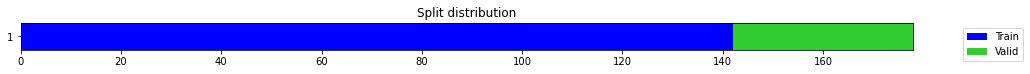

epoch,train_loss,valid_loss,accuracy,time
0,1.108273,1.267787,0.416667,00:00
1,0.885024,1.174368,0.416667,00:00
2,0.780334,1.118310,0.416667,00:00
3,0.718029,1.064595,0.416667,00:00
4,0.692208,0.999157,0.611111,00:00
5,0.662674,0.924909,0.666667,00:00
6,0.645353,0.866155,0.611111,00:00
7,0.631023,0.806695,0.666667,00:00
8,0.611938,0.721282,0.666667,00:00
9,0.606597,0.798815,0.611111,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.351164,0.824661,0.777778,00:00
1,0.368335,0.868738,0.777778,00:00
2,0.377562,1.084940,0.694444,00:00
3,0.366187,2.177532,0.527778,00:00
4,0.348151,4.283617,0.500000,00:00
5,0.448350,0.758770,0.666667,00:00
6,0.470055,73.367950,0.250000,00:00
7,0.486790,94.491119,0.250000,00:00
8,0.499505,66.423126,0.250000,00:00
9,0.502599,37.555565,0.250000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.545891,0.621670,0.750000,00:00
1,0.517033,0.663063,0.750000,00:00
2,0.506914,0.839327,0.666667,00:00
3,0.496976,1.279957,0.583333,00:00
4,0.489666,2.078161,0.500000,00:00
5,0.482956,3.210062,0.527778,00:00
6,0.473573,3.691610,0.527778,00:00
7,0.466276,5.457267,0.527778,00:00
8,0.454854,3.593546,0.527778,00:00
9,0.451184,4.901997,0.527778,00:00


 91%|██████████████████████████████████████████▌    | 29/32 [07:28<00:22,  7.38s/trial, best loss: -0.9888888888888889]

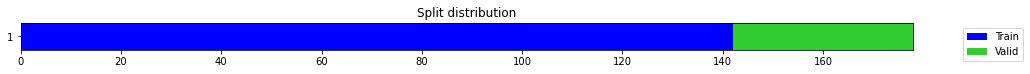

epoch,train_loss,valid_loss,accuracy,time
0,0.804729,1.076747,0.250000,00:00
1,0.723132,1.049563,0.250000,00:00
2,0.696896,1.016203,0.305556,00:00
3,0.677467,0.972669,0.527778,00:00
4,0.654691,0.916516,0.583333,00:00
5,0.661437,0.860799,0.611111,00:00
6,0.649133,0.838508,0.611111,00:00
7,0.635793,0.832333,0.611111,00:00
8,0.627878,0.815736,0.611111,00:00
9,0.621167,0.750270,0.611111,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.445577,0.772621,0.805556,00:00
1,0.440728,0.725567,0.777778,00:00
2,0.424969,0.724910,0.777778,00:00
3,0.428862,1.204250,0.638889,00:00
4,0.422266,2.746968,0.611111,00:00
5,0.419886,0.849017,0.750000,00:00
6,0.413342,3.914979,0.527778,00:00
7,0.431623,0.586762,0.805556,00:00
8,0.436116,8.120185,0.500000,00:00
9,0.436650,3.515592,0.611111,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.196106,0.439081,0.833333,00:00
1,0.210611,1.760024,0.666667,00:00
2,0.204274,7.147268,0.527778,00:00
3,0.198464,0.466613,0.805556,00:00
4,0.199040,0.484552,0.777778,00:00
5,0.219730,9.299571,0.333333,00:00
6,0.240551,1.808646,0.583333,00:00
7,0.313589,3.956753,0.527778,00:00
8,0.342972,9.764830,0.333333,00:00
9,0.363225,69.861816,0.250000,00:00


 94%|████████████████████████████████████████████   | 30/32 [08:20<00:41, 20.81s/trial, best loss: -0.9888888888888889]

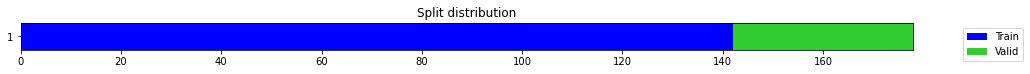

epoch,train_loss,valid_loss,accuracy,time
0,1.015520,1.107966,0.416667,00:01
1,0.820841,1.078084,0.611111,00:01
2,0.734104,1.043057,0.277778,00:01
3,0.692137,0.994737,0.305556,00:01
4,0.663609,0.946243,0.361111,00:01
5,0.643041,0.889407,0.388889,00:01
6,0.626772,0.832439,0.611111,00:01
7,0.608863,0.774387,0.611111,00:01
8,0.596002,0.701303,0.666667,00:01
9,0.585446,0.619665,0.638889,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.360333,1.149200,0.666667,00:01
1,0.343259,0.946328,0.750000,00:01
2,0.332864,1.677830,0.638889,00:01
3,0.338787,10.532215,0.416667,00:01
4,0.476948,4.363725,0.527778,00:01
5,0.482372,5.591594,0.361111,00:01
6,0.497154,5.041481,0.527778,00:01
7,0.493987,1.856345,0.638889,00:01
8,0.497474,28.665964,0.277778,00:01
9,0.498334,26.047003,0.305556,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.355813,0.825743,0.750000,00:01
1,0.342093,0.860799,0.750000,00:01
2,0.334417,0.958317,0.722222,00:01
3,0.321436,1.945755,0.555556,00:01
4,0.337816,0.774452,0.666667,00:01
5,0.341120,2.258110,0.444444,00:01
6,0.336926,8.244439,0.333333,00:01
7,0.343846,2.113174,0.583333,00:01
8,0.341374,3.670936,0.472222,00:01
9,0.339966,1.631206,0.361111,00:01


 97%|█████████████████████████████████████████████▌ | 31/32 [09:44<00:39, 39.55s/trial, best loss: -0.9888888888888889]

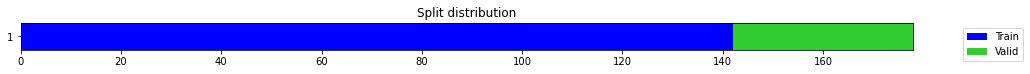

epoch,train_loss,valid_loss,accuracy,time
0,1.028654,1.084879,0.250000,00:00
1,0.893251,1.078309,0.250000,00:00
2,0.796126,1.064792,0.250000,00:00
3,0.730617,1.044052,0.277778,00:00
4,0.701871,1.016836,0.500000,00:00
5,0.676975,0.975489,0.611111,00:00
6,0.655944,0.920116,0.611111,00:00
7,0.638151,0.859483,0.611111,00:00
8,0.621341,0.794589,0.666667,00:00
9,0.602589,0.718616,0.666667,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.436967,0.766742,0.750000,00:00
1,0.404097,0.777595,0.750000,00:00
2,0.401997,0.933539,0.694444,00:00
3,0.395901,1.095186,0.611111,00:00
4,0.386004,0.647760,0.777778,00:00
5,0.393528,0.751511,0.722222,00:00
6,0.408012,0.645902,0.722222,00:00
7,0.413518,3.212955,0.638889,00:00
8,0.412438,3.640728,0.638889,00:00
9,0.406164,5.607793,0.611111,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.177685,0.557908,0.777778,00:00
1,0.199966,0.759638,0.777778,00:00
2,0.189188,1.004092,0.750000,00:00
3,0.173251,0.649992,0.777778,00:00
4,0.171303,2.796701,0.583333,00:00
5,0.204459,2.019471,0.361111,00:00
6,0.208973,3.016268,0.444444,00:00
7,0.211526,5.383733,0.416667,00:00
8,0.210546,2.978259,0.583333,00:00
9,0.203567,0.397170,0.861111,00:00


100%|███████████████████████████████████████████████| 32/32 [10:11<00:00, 19.12s/trial, best loss: -0.9888888888888889]

2021-12-12 17:29:02,877 - DataFactory - INFO - ...End finetuning
2021-12-12 17:29:02,878 - DataFactory - INFO - Best model is: random_forest with parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [8]:
# loss in this case refers to -accuracy
model, score = datafactory.finetune(X, y, method='hyperopt', models=models, cv=3, mtype='C')

In [9]:
score

0.9888888888888889

If we want to define custom parameters, they should be defined with the functions of hyperopt. Look at the [sklearn](https://scikit-learn.org/stable/) and [TSAI](https://github.com/timeseriesAI/tsai) website to find the hyperparamters of the models. Attention: The identifier of the hyperparameters need to be unique for ever parameter (also between models).

In [10]:
models = ['decision_tree', 'random_forest', 'adaboost', 'inception_time']
# attention the label has to be unique for every parameter (also between models)
dt_params = {'max_depth': hp.quniform('max_depth_dt', 1, 10, 1), 'criterion': hp.choice('criterion_dt', ['gini', 'entropy']), 'min_samples_leaf': hp.choice('min_samples_leaf_dt', [1, 2, 4])}
rf_params = {'max_depth': hp.choice('max_depth_rf', [1, 2, 3, 5, 10, 20, 50]), 'n_estimators': hp.choice('n_estimators_rf', [50, 100, 200])}
ab_params = {'n_estimators': hp.choice('n_estimators_ab', [50, 100, 200]), 'learning_rate': hp.choice('learning_rate_ab', [0.001,0.01,.1,1.0])}
# tsai uses a learner, you also can finetune its parameters
it_learner_params = {'epochs': hp.choice('epochs_it', [25, 50]), 'lr_max': hp.choice('lr_max_it', [1e-3, 1e-5]), 'opt_func':  hp.choice('optimizer_it', ['adam']), 'loss_func': hp.choice('loss_it', ['mse']), 'batch_tfms': ['standardize'], 'batch_size': [64, 128], 'splits': None, 'metrics': ['accuracy']}
it_params = {'learner': it_learner_params, 'nf': hp.choice('nf_it', [32, 64]), 'nb_filters': hp.choice('nb_filters_it', [32, 64, 96, 128])}
# put every hyperparameter definition in an own dictionary
params = {'strategy': 'random', 'decision_tree': dt_params, 'random_forest': rf_params, 'adaboost': ab_params, 'inception_time': it_params}

2021-12-12 17:29:02,939 - DataFactory - INFO - Start finetuning...


  0%|                                                                           | 0/32 [00:00<?, ?trial/s, best loss=?]

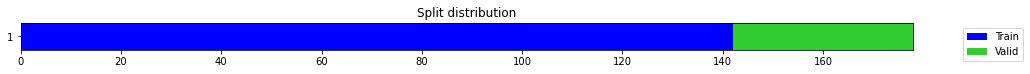

epoch,train_loss,valid_loss,accuracy,time
0,0.850295,1.106686,0.250000,00:00
1,0.734798,1.073504,0.250000,00:00
2,0.686417,1.042297,0.250000,00:00
3,0.653886,1.000582,0.416667,00:00
4,0.644480,0.962640,0.555556,00:00
5,0.629263,0.903828,0.583333,00:00
6,0.617289,0.849245,0.611111,00:00
7,0.605051,0.787251,0.611111,00:00
8,0.589791,0.727503,0.611111,00:00
9,0.585654,0.652184,0.611111,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.385557,1.008554,0.666667,00:00
1,0.382186,1.027075,0.666667,00:00
2,0.378634,1.014106,0.722222,00:00
3,0.376511,0.814702,0.750000,00:00
4,0.362320,0.913754,0.638889,00:00
5,0.385884,2.851604,0.416667,00:00
6,0.417547,1.402756,0.388889,00:00
7,0.429069,2.755977,0.611111,00:00
8,0.440210,3.514707,0.611111,00:00
9,0.445416,2.617196,0.611111,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.304314,1.761692,0.527778,00:00
1,0.276864,1.388348,0.583333,00:00
2,0.285617,1.024438,0.722222,00:00
3,0.285263,0.418948,0.805556,00:00
4,0.293974,3.345675,0.555556,00:00
5,0.301406,9.050637,0.638889,00:00
6,0.353280,1.894864,0.388889,00:00
7,0.360087,5.618601,0.333333,00:00
8,0.400630,134.744400,0.250000,00:00
9,0.420957,74.175766,0.250000,00:00


  9%|████▌                                           | 3/32 [01:02<08:53, 18.38s/trial, best loss: -0.9833333333333334]

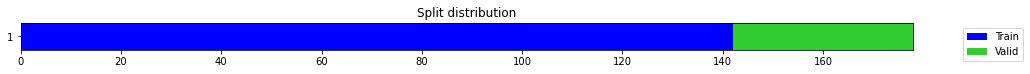

epoch,train_loss,valid_loss,accuracy,time
0,0.979542,1.120977,0.333333,00:00
1,0.815663,1.089291,0.416667,00:00
2,0.727959,1.061243,0.527778,00:00
3,0.685008,1.021105,0.416667,00:00
4,0.652545,0.969250,0.416667,00:00
5,0.632378,0.912606,0.444444,00:00
6,0.625815,0.854228,0.527778,00:00
7,0.612531,0.788640,0.777778,00:00
8,0.594036,0.705392,0.805556,00:00
9,0.585100,0.651046,0.777778,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.406859,0.801581,0.805556,00:00
1,0.388440,0.899105,0.722222,00:00
2,0.376716,1.374189,0.611111,00:00
3,0.381110,1.210325,0.694444,00:00
4,0.399027,10.811104,0.444444,00:00
5,0.492257,17.741770,0.472222,00:00
6,0.504196,39.172836,0.250000,00:00
7,0.512747,33.791763,0.277778,00:00
8,0.513946,21.510695,0.305556,00:00
9,0.515258,11.708372,0.472222,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.371085,0.820393,0.722222,00:00
1,0.374521,0.998421,0.638889,00:00
2,0.366192,1.189621,0.527778,00:00
3,0.363483,1.070128,0.611111,00:00
4,0.367658,0.795400,0.694444,00:00
5,0.366631,1.976339,0.638889,00:00
6,0.365059,2.191071,0.611111,00:00
7,0.363755,2.129830,0.583333,00:00
8,0.354225,0.927858,0.722222,00:00
9,0.345673,1.764570,0.638889,00:00


 41%|███████████████████                            | 13/32 [02:10<00:50,  2.65s/trial, best loss: -0.9888888888888889]

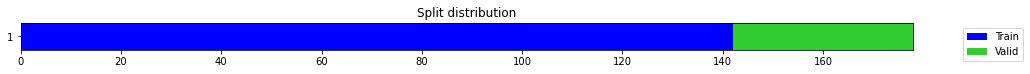

epoch,train_loss,valid_loss,accuracy,time
0,1.033465,1.081900,0.250000,00:01
1,0.820744,1.058688,0.250000,00:01
2,0.746576,1.028308,0.277778,00:01
3,0.706369,0.992820,0.444444,00:01
4,0.692593,0.945324,0.583333,00:01
5,0.670652,0.916756,0.611111,00:01
6,0.650829,0.909779,0.583333,00:01
7,0.634976,0.880695,0.611111,00:01
8,0.619197,0.852497,0.611111,00:01
9,0.611325,0.915530,0.583333,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.451548,0.786621,0.750000,00:01
1,0.452249,1.171674,0.611111,00:01
2,0.436930,2.798925,0.527778,00:01
3,0.445465,1.012680,0.722222,00:01
4,0.450119,0.729963,0.777778,00:01
5,0.448337,5.970068,0.527778,00:01
6,0.458537,1.140887,0.500000,00:01
7,0.465656,1.019757,0.388889,00:01
8,0.468864,0.986730,0.500000,00:01
9,0.468116,0.961414,0.555556,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.191741,1.175581,0.750000,00:01
1,0.193191,1.316855,0.666667,00:01
2,0.194329,3.011195,0.527778,00:01
3,0.219010,1.568791,0.694444,00:01
4,0.219392,13.735343,0.416667,00:01
5,0.252011,4.873929,0.416667,00:01
6,0.268904,16.546101,0.416667,00:01
7,0.295645,7.028185,0.416667,00:01
8,0.295578,8.380588,0.638889,00:01
9,0.287508,18.672176,0.638889,00:01


 53%|████████████████████████▉                      | 17/32 [03:49<02:57, 11.84s/trial, best loss: -0.9888888888888889]

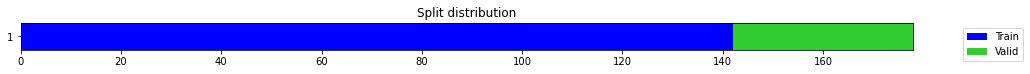

epoch,train_loss,valid_loss,accuracy,time
0,0.907681,1.093160,0.611111,00:00
1,0.762800,1.067647,0.277778,00:00
2,0.711113,1.039523,0.305556,00:00
3,0.672933,1.001094,0.361111,00:00
4,0.660477,0.958698,0.583333,00:00
5,0.656418,0.916337,0.555556,00:00
6,0.647273,0.901964,0.611111,00:00
7,0.628160,0.868797,0.361111,00:00
8,0.620570,0.819390,0.555556,00:00
9,0.610832,0.780217,0.583333,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.398075,0.951664,0.666667,00:00
1,0.402218,1.072303,0.666667,00:00
2,0.424253,1.301179,0.638889,00:00
3,0.417352,0.704950,0.805556,00:00
4,0.407682,3.356463,0.527778,00:00
5,0.405456,3.345407,0.527778,00:00
6,0.398498,5.036995,0.527778,00:00
7,0.390712,11.710279,0.472222,00:00
8,0.417934,1.839858,0.527778,00:00
9,0.443087,13.469821,0.250000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.491280,0.536972,0.833333,00:00
1,0.472740,0.569682,0.777778,00:00
2,0.466383,0.683163,0.750000,00:00
3,0.464037,0.996407,0.666667,00:00
4,0.465874,1.349401,0.638889,00:00
5,0.453115,2.789724,0.444444,00:00
6,0.463162,2.291035,0.611111,00:00
7,0.458996,6.745427,0.583333,00:00
8,0.463560,5.242735,0.611111,00:00
9,0.460916,2.977970,0.611111,00:00


 56%|██████████████████████████▍                    | 18/32 [04:52<05:37, 24.11s/trial, best loss: -0.9888888888888889]

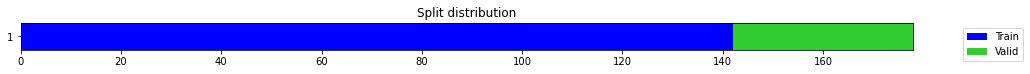

epoch,train_loss,valid_loss,accuracy,time
0,0.975288,1.099822,0.250000,00:00
1,0.837319,1.093884,0.250000,00:00
2,0.764617,1.075609,0.250000,00:00
3,0.725123,1.046245,0.277778,00:00
4,0.688709,1.005124,0.333333,00:00
5,0.664455,0.951500,0.361111,00:00
6,0.642700,0.891464,0.444444,00:00
7,0.627287,0.823359,0.722222,00:00
8,0.616992,0.765603,0.805556,00:00
9,0.603241,0.705422,0.638889,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.402728,0.799578,0.694444,00:00
1,0.384889,0.765547,0.722222,00:00
2,0.384036,0.785455,0.694444,00:00
3,0.378700,1.468610,0.638889,00:00
4,0.364473,1.548365,0.611111,00:00
5,0.407447,0.711085,0.777778,00:00
6,0.416178,0.681157,0.750000,00:00
7,0.423443,0.661948,0.777778,00:00
8,0.427237,0.656976,0.694444,00:00
9,0.418836,1.004677,0.611111,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.181279,0.534558,0.805556,00:00
1,0.169809,0.243463,0.916667,00:00
2,0.158454,0.183264,0.916667,00:00
3,0.153647,0.532203,0.805556,00:00
4,0.150180,1.338549,0.638889,00:00
5,0.153048,29.684862,0.416667,00:00
6,0.243165,8.558346,0.333333,00:00
7,0.313226,42.460186,0.250000,00:00
8,0.357905,60.568344,0.250000,00:00
9,0.380083,44.017586,0.250000,00:00


100%|███████████████████████████████████████████████| 32/32 [05:24<00:00, 10.16s/trial, best loss: -0.9888888888888889]

2021-12-12 17:34:28,001 - DataFactory - INFO - ...End finetuning
2021-12-12 17:34:28,002 - DataFactory - INFO - Best model is: random_forest with parameters: {'max_depth': 10, 'n_estimators': 200}


In [11]:
model, score = datafactory.finetune(X, y, method='hyperopt', models=models, cv=3, mtype='C', params=params.copy())

In [12]:
score

0.9888888888888889

### Native Search

Sklearn and TSAI also provide functions/propose methods to tune the hyperparameters for a specific model. We implemented a function that uses them to find the best model.

In [13]:
# list with models to try out
models = ['decision_tree', 'random_forest', 'adaboost']

In [14]:
model, score = datafactory.finetune(X, y, method='native', models=models, cv=5, mtype='C')

2021-12-12 17:34:28,044 - DataFactory - INFO - Start finetuning...
2021-12-12 17:34:28,045 - DataFactory - INFO - Start search for best parameters of: decision_tree...
2021-12-12 17:34:29,895 - DataFactory - INFO - ...End search
2021-12-12 17:34:29,895 - DataFactory - INFO - Best parameters are: {'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 9, 'criterion': 'gini'} with score 0.96
2021-12-12 17:34:29,896 - DataFactory - INFO - Start search for best parameters of: random_forest...
2021-12-12 17:34:31,375 - DataFactory - INFO - ...End search
2021-12-12 17:34:31,376 - DataFactory - INFO - Best parameters are: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50} with score 0.96
2021-12-12 17:34:31,376 - DataFactory - INFO - Start search for best parameters of: adaboost...
2021-12-12 17:34:32,870 - DataFactory - INFO - ...End search
2021-12-12 17:34:32,871 - DataFactory - INFO - Best parameters are: {'n_estimators': 100, 'learning_rate': 0.01} 

In [15]:
score

0.9555555555555556

Here we defined a custom search space:

In [16]:
# list with params for every model to try out (search strategy of hyperparameters should be in ['grid', 'random'])
params = {'strategy': 'random', 'decision_tree': {"criterion": ['gini', 'entropy'], "max_depth": range(1, 50), "min_samples_split": range(1, 20), "min_samples_leaf": range(1, 5)}, 'random_forest': {'max_depth': [1, 2, 3, 5, 10, 20, 50], 'min_samples_leaf': [1, 5, 10], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200]}, 'adaboost': {'n_estimators': [50, 100, 200], 'learning_rate':[0.001,0.01,.1]}}

In [17]:
model, score = datafactory.finetune(X, y, method='native', models=models, cv=5, mtype='C', params=params)

2021-12-12 17:34:32,924 - DataFactory - INFO - Start finetuning...
2021-12-12 17:34:32,925 - DataFactory - INFO - Start search for best parameters of: decision_tree...
2021-12-12 17:34:33,007 - DataFactory - INFO - ...End search
2021-12-12 17:34:33,007 - DataFactory - INFO - Best parameters are: {'min_samples_split': 16, 'min_samples_leaf': 3, 'max_depth': 16, 'criterion': 'entropy'} with score 0.96
2021-12-12 17:34:33,008 - DataFactory - INFO - Start search for best parameters of: random_forest...
2021-12-12 17:34:34,759 - DataFactory - INFO - ...End search
2021-12-12 17:34:34,760 - DataFactory - INFO - Best parameters are: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 5} with score 0.98
2021-12-12 17:34:34,760 - DataFactory - INFO - Start search for best parameters of: adaboost...
2021-12-12 17:34:36,200 - DataFactory - INFO - ...End search
2021-12-12 17:34:36,201 - DataFactory - INFO - Best parameters are: {'n_estimators': 100, 'learning_rate': 0

In [18]:
score

0.9779898668551902

### Auto-sklearn

Auto-sklearn requires a linux OS (otherwise it can be run on colab). It is an automated machine learning toolkit using sklearn models. It automatically trains different ML models with different hyperparameters. At the end it selects the best model. In the DataFactory you can use it like that:

In [ ]:
model, score = datafactory.finetune(X, y, method='auto_sklearn', mtype='C')

In [ ]:
score